<a href="https://colab.research.google.com/github/weibb123/Unsupervised_sentiment_analysis_on_Youtube/blob/main/Unsupervised_Sentiment_Analysis_on_youtube_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose
For this notebook, we will be do data analysis and predict sentiment for youtube videos comments. 




    

# Import




In [ ]:
import os
import shutil

import random
import nltk
import re

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# filename = 3Blue1Brown_comments.csv
url = 'https://raw.githubusercontent.com/weibb123/BERT_on_Youtube_Comments/main/3Blue1Brown_comments.csv'
df = pd.read_csv(url)
df.head

<bound method NDFrame.head of       Unnamed: 0                                            comment
0              0  how to make a presentation like this? With whi...
1              1                                             Great!
2              2  "It's just a function." Yeah, so are our neuro...
3              3                the Chinese subscript is just chaos
4              4  Incomplete Lion picture 🤔 since the eye detect...
...          ...                                                ...
4487        4487  Dear 3B1B, what software / workflow do you use...
4488        4488                YESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
4489        4489  PART 1? THERE WILL BE MORE? YAS 3BLUE1BROWN IS...
4490        4490                                           secound!
4491        4491                                               Yes!

[4492 rows x 2 columns]>

# Preprocess text procedure
<br> 1. Use stopword to eliminate unimportant words </br>
<br> 2. Not considering using a Stemmer. There are pros and cons to stemming, either overstemming or understemming a sentence. </br>
<br> 3. Get rid of links, mentions, special characters, digits from comments </br>
<br> 4. Make all comments lower case and strip any empty spaces </br>



In [ ]:
english_stopwords = stopwords.words('english')

#stemmer = SnowballStemmer('english')

regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" # getting rid of special characters might occur in dataframe

#regex for mentions and links in tweets
def preprocess(comment, stem=False):
  comment = re.sub(regex, ' ', str(comment).lower()).strip()
  tokens = []
  for token in comment.split():
    if token not in english_stopwords:
      tokens.append(token)
  return " ".join(tokens)


df.comment = df.comment.apply(lambda x: preprocess(x))
df.head(10)

,Unnamed: 0,comment
0,0,make presentation like software
1,1,great
2,2,function yeah neurons put enough dumb function...
3,3,chinese subscript chaos
4,4,incomplete lion picture since eye detects colo...
5,5,please make videos cnns lstms
6,6,one neatest dives broad field machine learning...
7,7,excellent video thank found 14 59 video bias v...
8,8,please animation spiking neural network snns n...
9,9,cracks like wow fing amazing sigmoid end woah ...


## Check if there are any null values in dataframe

In [ ]:
df.isnull().values.any()

False

## Unsupervised Learning
Because our dataset is unlabel, we do not have a label to use <b> supervised Learning! </b>
<br> Vader Sentiment able to predict sentiment on unlabel data. An algorithm that is design specifically to predict social media texts. It performs well with emojis, slangs, and acronyms in sentence </br>

## Accuracy?
Again, CREDIT: Vader algorithm Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014. 

<br> Author of the paper claims that Vader has F1 Score(0.96) </br>
$$ F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN} $$ 
<br> F1 score is a metric to rate performance and define as harmonic mean of precision and recall. Use harmonic mean instead of arithmetic mean is to minimize impact of large outliers. </br>

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install vaderSentiment


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_score(x):
  if x >= 0.05:
    return "positive" # meaning positive
  elif x <= -0.05:
    return "negative"  # meaning NEGATIVE
  else:
    return "neutral" # meaning Neutral


In [ ]:
df['scores'] = df['comment'].apply(lambda review: analyser.polarity_scores(review))
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound']) # access values in dictionary

df['sentiment'] = df['compound'].apply(sentiment_score)

df.head()

,Unnamed: 0,comment,scores,compound,sentiment
0,0,make presentation like software,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.3612,positive
1,1,great,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,positive
2,2,function yeah neurons put enough dumb function...,"{'neg': 0.2, 'neu': 0.667, 'pos': 0.133, 'comp...",-0.2732,negative
3,3,chinese subscript chaos,"{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'comp...",-0.5719,negative
4,4,incomplete lion picture since eye detects colo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [ ]:
df = df.drop(columns=['scores', 'compound', 'Unnamed: 0'])
df.head()

,comment,sentiment
0,make presentation like software,positive
1,great,positive
2,function yeah neurons put enough dumb function...,negative
3,chinese subscript chaos,negative
4,incomplete lion picture since eye detects colo...,neutral


In [ ]:
df.sample(50) 

,comment,sentiment
1534,japanese understand videos japanese subtitles ...,positive
3072,first thought 1 one vertical line one vertical...,positive
2317,used prove earth flat sarcasm mode disengaged,negative
1001,thank much understand,positive
3962,much vocal fry,neutral
568,alright probably understood 10 talking watch e...,positive
2965,10,neutral
2917,deep learning deep learning,neutral
1083,obsess math soul heart idea connect fellow man...,positive
643,love fact specified get rich fast scheme know ...,positive


# Explore Data Analysis

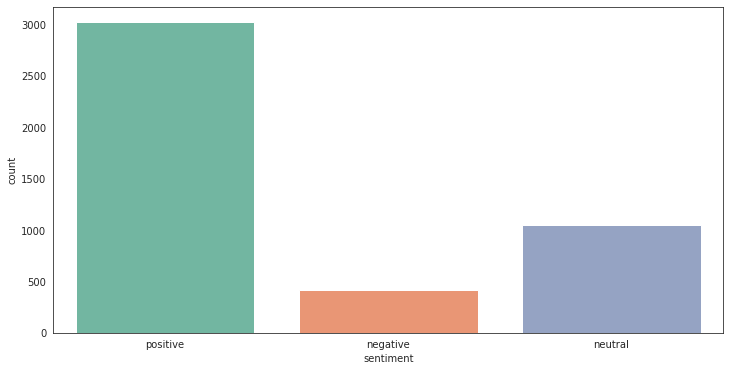

In [ ]:
import seaborn as sns

var1 = df.groupby('sentiment').count()['comment'].reset_index().sort_values(by='comment',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

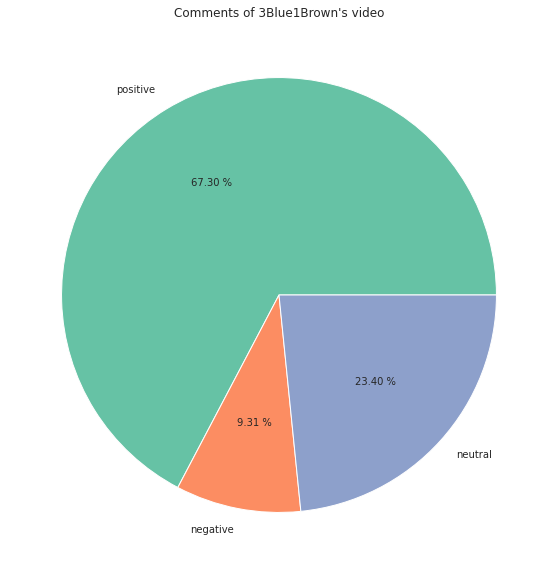

In [ ]:
positive = df.loc[df['sentiment'] == 'positive'].count()[0]
negative = df.loc[df['sentiment'] == 'negative'].count()[0]
neutral = df.loc[df['sentiment'] == 'neutral'].count()[0]
labels = ['positive', 'negative', 'neutral']

plt.figure(figsize=(14,10)) 
plt.pie([positive, negative, neutral], labels = labels, autopct = '%.2f %%', radius=1)
plt.title("Comments of 3Blue1Brown's video")

plt.show()

I mean is 3Blue1Brown's videos, of course there will be more positive comments on his videos. This makes sense.

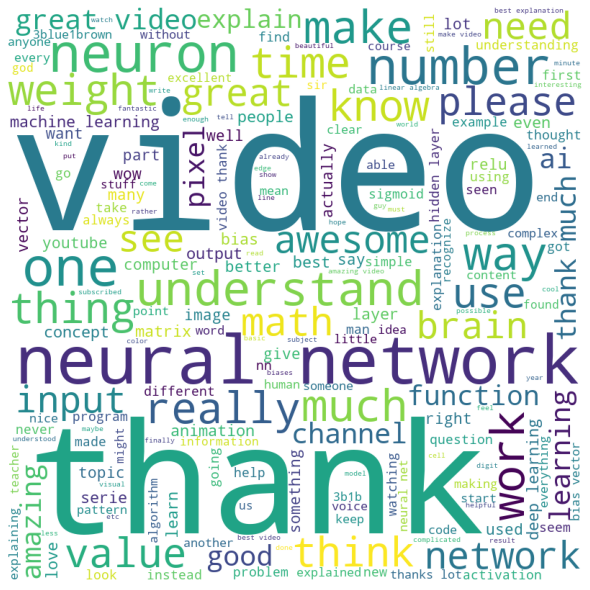

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.comment: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Common words in this video

# Predict comments of own examples

In [ ]:
def test_my_comments(inputs):
  for i in range(len(inputs)):

    score = analyser.polarity_scores(inputs[i])
    output = score['compound']
    sentiment = sentiment_score(output)
    print("Comments: ", inputs[i])
    print()
    print("Prediction: ", sentiment)
    print()


examples = ['I feel like wasting my time here...',
            'Do you watch Squid game',
            ':)',
            '😂',
            '😭😭😭',
            'These visual presentation are so awesome',
            'lol',
            ':(',
            'hello there'
            ]
            


test_my_comments(examples)

Comments:  I feel like wasting my time here...

Prediction:  negative

Comments:  Do you watch Squid game

Prediction:  neutral

Comments:  :)

Prediction:  positive

Comments:  😂

Prediction:  positive

Comments:  😭😭😭

Prediction:  negative

Comments:  These visual presentation are so awesome

Prediction:  positive

Comments:  lol

Prediction:  positive

Comments:  :(

Prediction:  negative

Comments:  hello there

Prediction:  neutral



# Presidential-Debate datafile Data Analysis

This dataset might have wild comments.... WARNING 

In [ ]:
url2 = 'https://raw.githubusercontent.com/weibb123/Unsupervised_sentiment_analysis_on_Youtube/main/PresidentialDebate_comments.csv'
df2 = pd.read_csv(url2, lineterminator='\n')
df2.head

<bound method NDFrame.head of        Unnamed: 0                                            comment
0               0  Joe Biden: "Show us your tax returns". What a ...
1               1   We see now who told us the truth in this debate.
2               2  Joe doesn't trust Trump, but he trusts Fauci! ...
3               3               Here's  the deal: Let's Go Brandon!!
4               4  Blue vs. Red; The 2020 Election | Marcus Ward ...
...           ...                                                ...
52488       52488                                                LOL
52489       52489                                         TRUMP 2020
52490       52490                                                 Ok
52491       52491                                  Fuck Donald Trump
52492       52492                                        Heated lmao

[52493 rows x 2 columns]>

In [ ]:
df2.comment = df2.comment.apply(lambda x: preprocess(x))
df2.head(10)

,Unnamed: 0,comment
0,0,joe biden show us tax returns pervert
1,1,see told us truth debate
2,2,joe trust trump trusts fauci truly laughable
3,3,deal let go brandon
4,4,blue vs red 2020 election marcus ward show mar...
5,5,united kingdom belive kept trump control afrai...
6,6,begin 29 24
7,7,trump vs biden 2024 debate main event lightwei...
8,8,also imagine told truth 1 time imagine brain c...
9,9,goddamn dumb stupid smart smart joe even never...


In [ ]:
df2['scores'] = df2['comment'].apply(lambda review: analyser.polarity_scores(review))
df2['compound'] = df2['scores'].apply(lambda score_dict: score_dict['compound']) # access values in dictionary

df2['sentiment'] = df2['compound'].apply(sentiment_score)

df2.head()

,Unnamed: 0,comment,scores,compound,sentiment
0,0,joe biden show us tax returns pervert,"{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...",-0.5106,negative
1,1,see told us truth debate,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...",0.3182,positive
2,2,joe trust trump trusts fauci truly laughable,"{'neg': 0.0, 'neu': 0.222, 'pos': 0.778, 'comp...",0.8591,positive
3,3,deal let go brandon,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,4,blue vs red 2020 election marcus ward show mar...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [ ]:
df2.isnull().values.any()

False

In [ ]:
df2 = df2.drop(columns=['scores', 'compound', 'Unnamed: 0'])
df2.head()

,comment,sentiment
0,joe biden show us tax returns pervert,negative
1,see told us truth debate,positive
2,joe trust trump trusts fauci truly laughable,positive
3,deal let go brandon,neutral
4,blue vs red 2020 election marcus ward show mar...,neutral


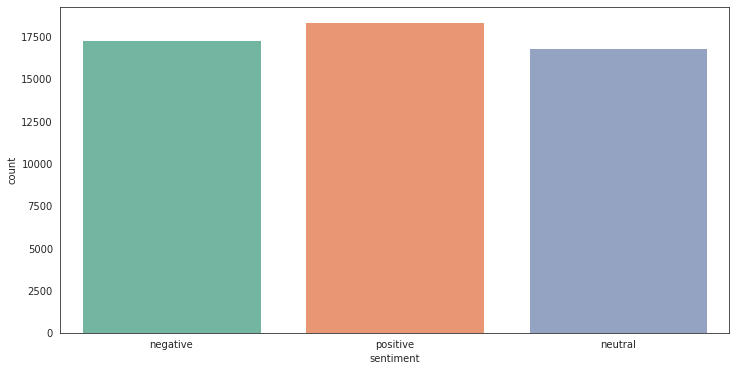

In [ ]:
var2 = df2.groupby('sentiment').count()['comment'].reset_index().sort_values(by='comment',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var2.style.background_gradient()

plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df2)

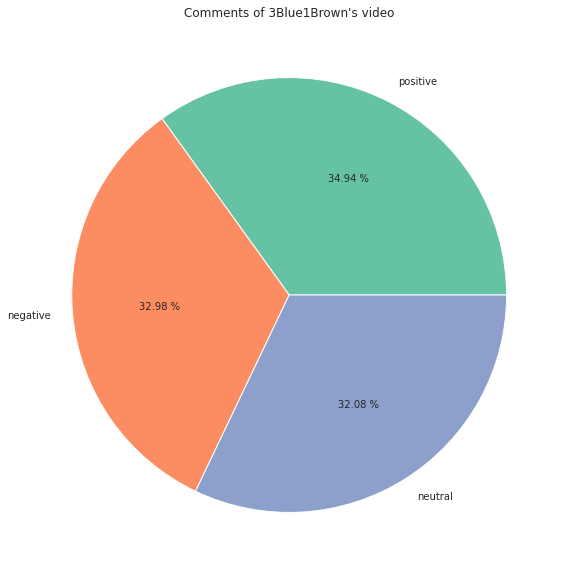

In [ ]:
positive = df2.loc[df2['sentiment'] == 'positive'].count()[0]
negative = df2.loc[df2['sentiment'] == 'negative'].count()[0]
neutral = df2.loc[df2['sentiment'] == 'neutral'].count()[0]
labels = ['positive', 'negative', 'neutral']

plt.figure(figsize=(14,10)) 
plt.pie([positive, negative, neutral], labels = labels, autopct = '%.2f %%', radius=1)
plt.title("Comments of 3Blue1Brown's video")

plt.show()

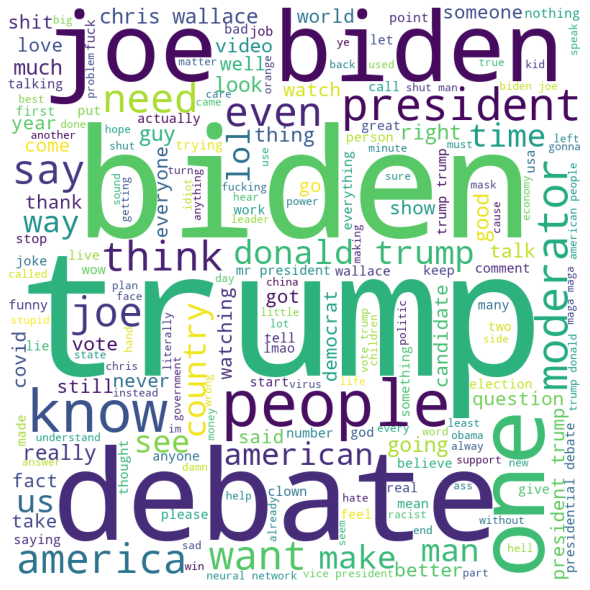

In [ ]:
# iterate through the csv file 
for val in df2.comment: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 